## A classification model using SVM for Salary Data
In this notebook, we will built a classification model using Support Vector Machines (SVM) to predict whether an individual's salary is above or below $50,000 based on various features such as age, occupation, and more. We will perform exploratory data analysis to gain insights into the data and preprocess it for modeling. Next, we will train an SVM model using the training data. We'll evaluate the model's performance on the testing data, fine-tune its hyperparameters and perform additional preprocessing to improve its accuracy. Overall, the goal of this notebook is to demonstrate how to build a classification model using SVM and how to optimize its performance.

## Section 1. Importing Necessary Libraries

In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.svm import SVC
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Section 2. Load Train and Test Dataset

In [2]:
# TODO: Load the 'SalaryData_Train.csv' file into a pandas dataframe called train_data
train_data = pd.read_csv('SalaryData_Train.csv')
# TODO: Load the 'SalaryData_Test.csv' file into a pandas dataframe called test_data
test_data = pd.read_csv('SalaryData_Test.csv')
# TODO: Display the first 5 or 10 rows of the train_data dataframe
train_data.iloc[0:5]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## Section 3. EDA

In [3]:
# TODO: Print the shape of the train_data dataframe
print('The shape of the train_data is:',train_data.shape)
# TODO: Print the shape of the test_data dataframe
print('The shape of the test_data is:',test_data.shape)
# TODO: Print the information about the train_data dataframe
display(train_data.info())
# TODO Display the summary statistics of the train_data dataframe
display(train_data.describe())
# TODO: Replace any NaN values in the train_data dataframe with 0
display(train_data.fillna(value = 0,inplace=True))
# TODO: Print the number of NaN values in each column of the train_data dataframe
display(train_data.isna().sum())

The shape of the train_data is: (30161, 14)
The shape of the test_data is: (15060, 14)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   age            30161 non-null  int64 
 1   workclass      30161 non-null  object
 2   education      30161 non-null  object
 3   educationno    30161 non-null  int64 
 4   maritalstatus  30161 non-null  object
 5   occupation     30161 non-null  object
 6   relationship   30161 non-null  object
 7   race           30161 non-null  object
 8   sex            30161 non-null  object
 9   capitalgain    30161 non-null  int64 
 10  capitalloss    30161 non-null  int64 
 11  hoursperweek   30161 non-null  int64 
 12  native         30161 non-null  object
 13  Salary         30161 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.2+ MB


None

,age,educationno,capitalgain,capitalloss,hoursperweek
count,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,10.121316,1092.044064,88.302311,40.931269
std,13.134830,2.550037,7406.466611,404.121321,11.980182
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,47.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


None

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

## Data Visualization

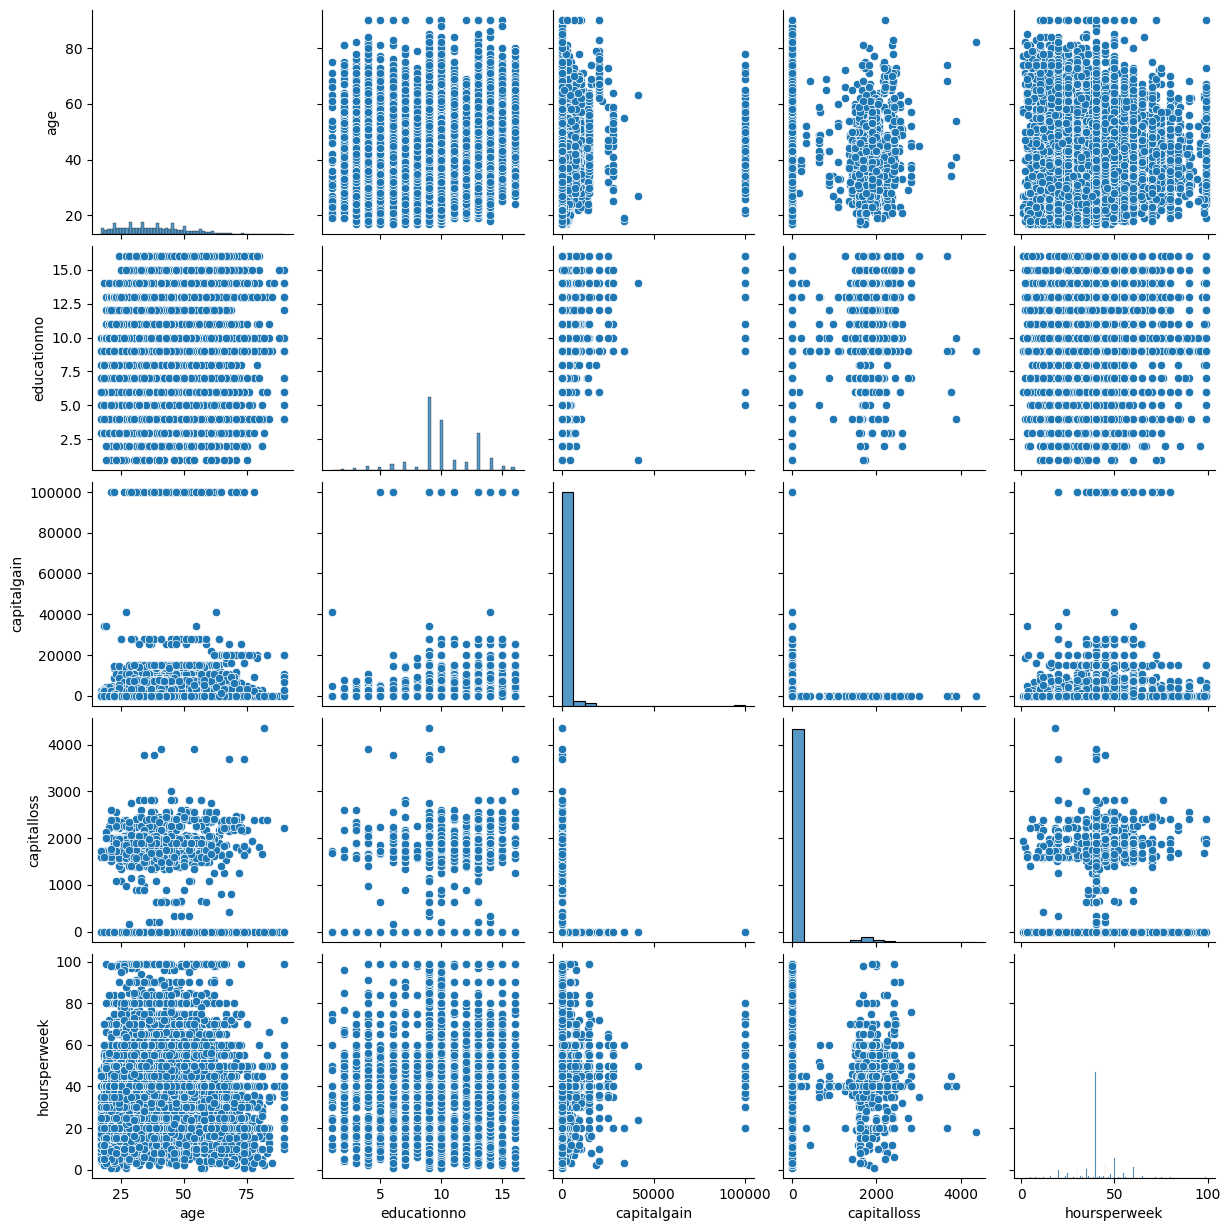

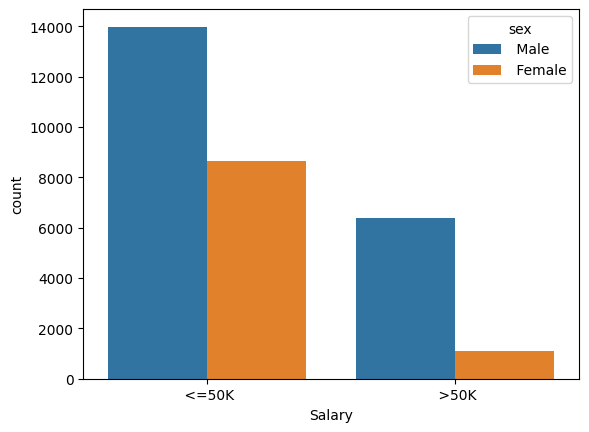

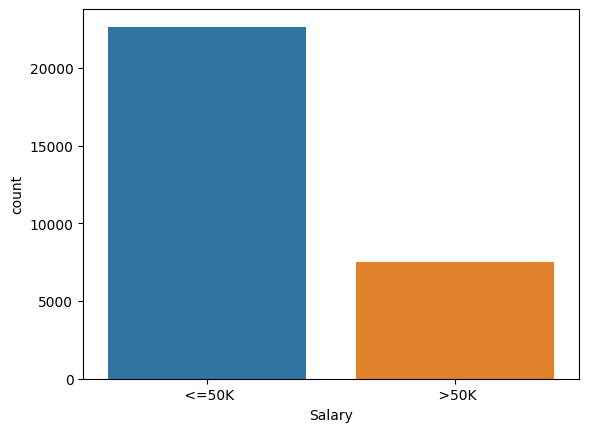

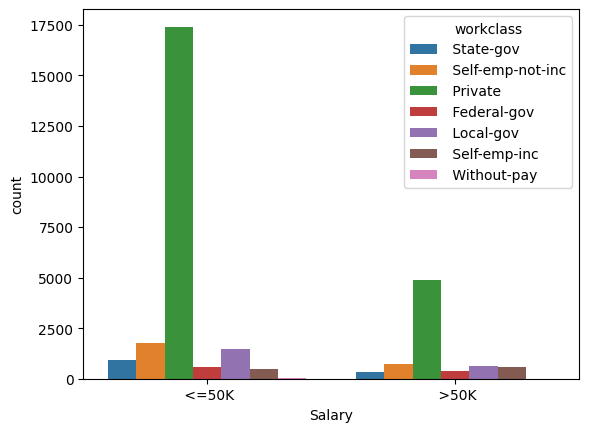

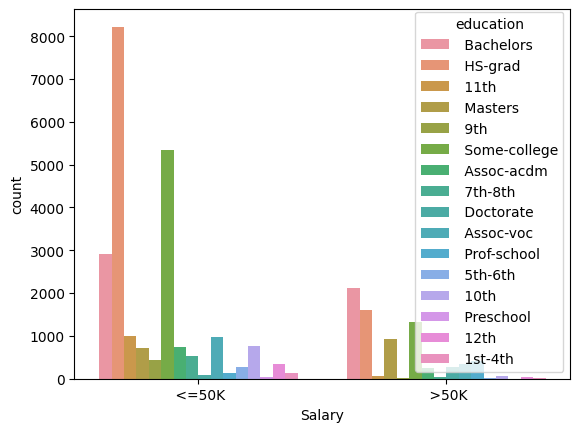

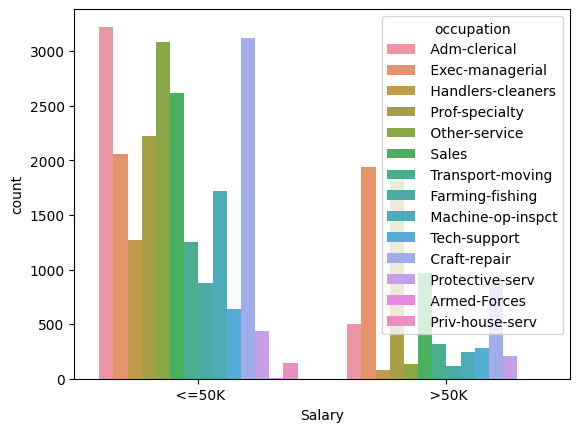

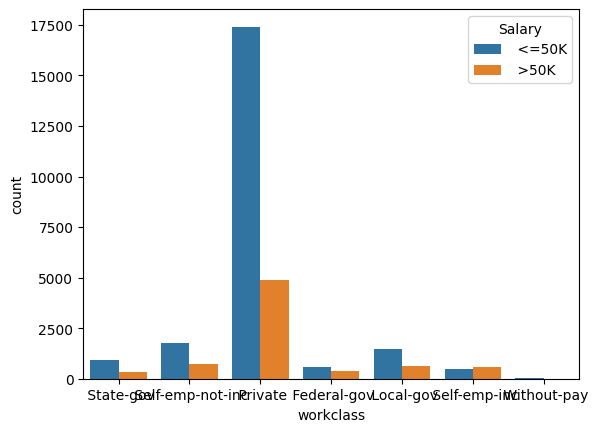

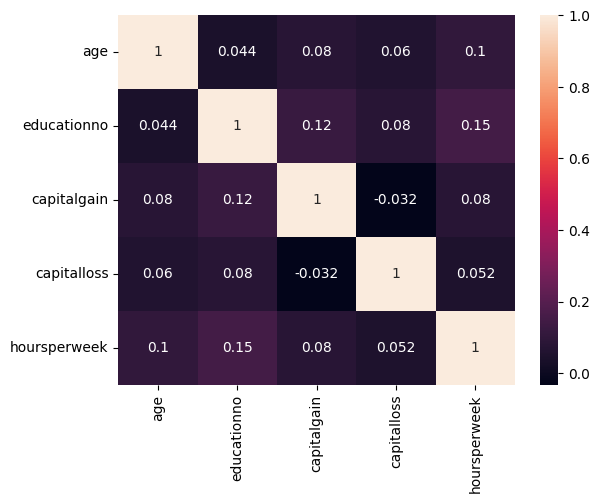

In [4]:
# TODO: Display pairwise relationships between variables in the train_data dataframe
sns.pairplot(train_data)
plt.show()
# TODO: Plot the average count of males and females in each salary group using a bar plot
sns.countplot(data = train_data,x = 'Salary',hue = 'sex')
plt.show()
## sns.barplot(data = train_data,x = 'Salary',hue = 'sex')
# TODO: Plot the count of each salary group in the train_data dataframe using a countplot
sns.countplot(data = train_data,x = 'Salary')
plt.show()
# TODO: Plot the count of each salary group in each workclass using a bar plot
sns.countplot(data = train_data,x = 'Salary',hue = 'workclass')
plt.show()
# TODO: Plot the average count of each education level in each salary group using a bar plot
sns.countplot(data = train_data,x = 'Salary',hue = 'education')
plt.show()
# TODO: Plot the average count of each occupation in each salary group using a bar plot
sns.countplot(data = train_data,x = 'Salary',hue = 'occupation')
plt.show()
# TODO: Plot the average count of each workclass in each salary group using a bar plot
sns.countplot(data = train_data,x = 'workclass',hue = 'Salary')
plt.show()
# TODO: Plot the correlation between variables in the train_data dataframe using a heatmap
sns.heatmap(train_data.corr(), annot=True)
plt.show()

###  Outliers Detection

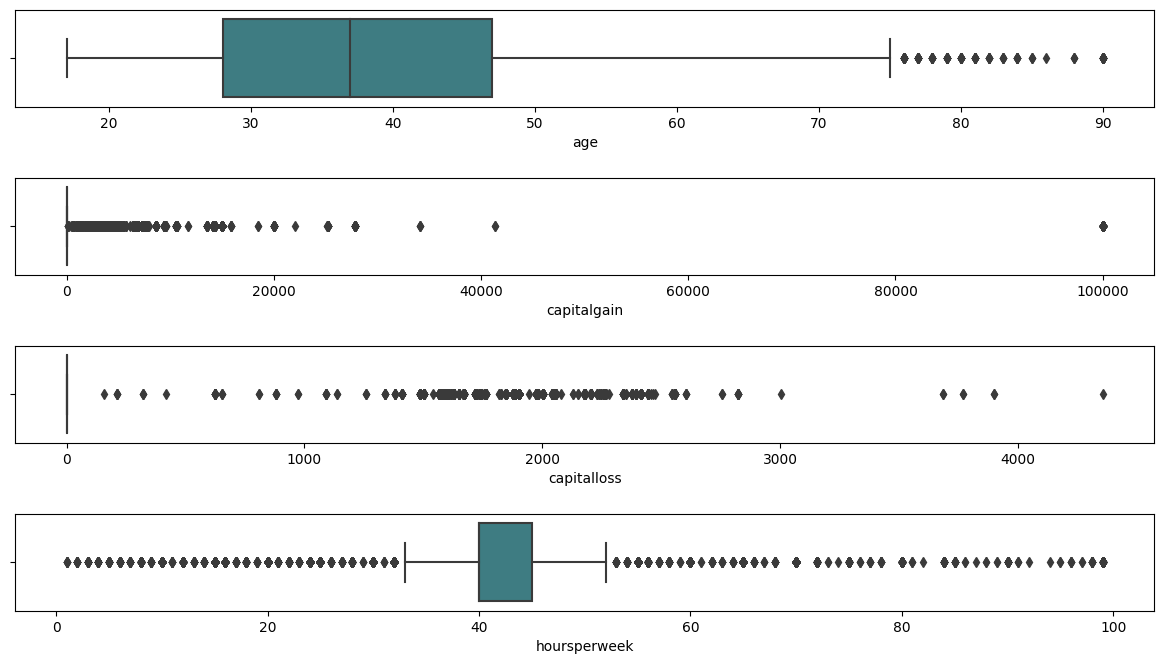

In [5]:
outlier1 = train_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier1,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier1,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier1,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier1,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

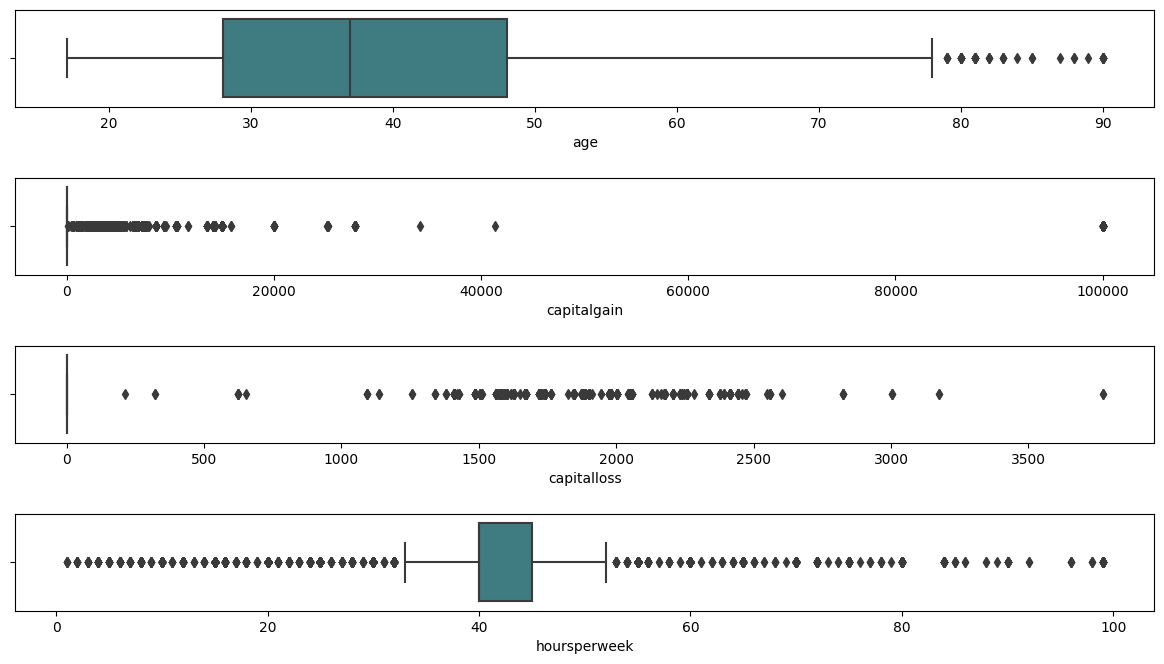

In [6]:
outlier2 = test_data.copy()
fig, axes=plt.subplots(4,1,figsize=(12,7),sharex=False,sharey=False)
sns.boxplot(x='age',data=outlier2,palette='crest',ax=axes[0])
sns.boxplot(x='capitalgain',data=outlier2,palette='crest',ax=axes[1])
sns.boxplot(x='capitalloss',data=outlier2,palette='crest',ax=axes[2])
sns.boxplot(x='hoursperweek',data=outlier2,palette='crest',ax=axes[3])
plt.tight_layout(pad=2.0)

#### There are lot of outliers present in the dataframe but we can't drop them because they are present in a very large quantity and can be important for model building

## Section 4. Data Preprocessing

In [7]:
import numpy as np
# TODO: Create a LabelEncoder object
le = LabelEncoder()
# TODO: Use the LabelEncoder object to transform these columns of the train_data dataframe:
# workclass, education, maritalstatus, occupation, relationship, race, sex, native
columns = ['workclass','education','maritalstatus','occupation','relationship','race','sex','native']
for feature in columns:
    train_data[feature] = le.fit_transform(train_data[feature])
# TODO: Display the modified train_data dataframe
display(train_data)
# TODO: Use a list comprehension to replace the values in the 'Salary' column of
# the train_data dataframe with 0 if the value is<=50K' and 1 if the value is '>50K'
train_data['Salary'] = [0 if x == ' <=50K' else 1 for x in train_data['Salary']]
# TODO: Do the same preprocessing to test data
le = LabelEncoder()
for feature in columns:
    test_data[feature] = le.fit_transform(test_data[feature])
display(test_data)
test_data['Salary'] = [0 if x == ' <=50K' else 1 for x in test_data['Salary']]

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,5,9,13,4,0,1,4,1,2174,0,40,37,<=50K
1,50,4,9,13,2,3,0,4,1,0,0,13,37,<=50K
2,38,2,11,9,0,5,1,4,1,0,0,40,37,<=50K
3,53,2,1,7,2,5,0,2,1,0,0,40,37,<=50K
4,28,2,9,13,2,9,5,2,0,0,0,40,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,7,12,2,12,5,4,0,0,0,38,37,<=50K
30157,40,2,11,9,2,6,0,4,1,0,0,40,37,>50K
30158,58,2,11,9,6,0,4,4,0,0,0,40,37,<=50K
30159,22,2,11,9,4,0,3,4,1,0,0,20,37,<=50K


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,25,2,1,7,4,6,3,2,1,0,0,40,37,<=50K
1,38,2,11,9,2,4,0,4,1,0,0,50,37,<=50K
2,28,1,7,12,2,10,0,4,1,0,0,40,37,>50K
3,44,2,15,10,2,6,0,2,1,7688,0,40,37,>50K
4,34,2,0,6,4,7,1,4,1,0,0,30,37,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15055,33,2,9,13,4,9,3,4,1,0,0,40,37,<=50K
15056,39,2,9,13,0,9,1,4,0,0,0,36,37,<=50K
15057,38,2,9,13,2,9,0,4,1,0,0,50,37,<=50K
15058,44,2,9,13,0,0,3,1,1,5455,0,40,37,<=50K


## Section 5. Model Building

In [8]:
# TODO: Create X_train by dropping the 'Salary' column from the train_data dataframe
X_train = train_data.drop('Salary',axis=1)
# TODO: Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train = train_data['Salary']
# TODO: Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test = test_data.drop('Salary',axis=1)
# TODO: Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test = test_data['Salary']
# TODO: Print the shape of X_train, y_train, X_test, and y_test dataframes
print('The shape of X_train is:',X_train.shape)
print('The shape of y_train is:',y_train.shape)
print('The shape of X_test is:',X_test.shape)
print('The shape of y_test is:',y_test.shape)
# TODO: Create a Support Vector Classifier object
clf = SVC()

The shape of X_train is: (30161, 13)
The shape of y_train is: (30161,)
The shape of X_test is: (15060, 13)
The shape of y_test is: (15060,)


## Section 6. Model Training | Testing | Evaluation - SVM Model

In [9]:
# TODO: Train the svc model with X_train and y_train
clf.fit(X_train,y_train)
# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = clf.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
print('The confusion matrix is:',confusion_matrix(y_test,y_pred))
# TODO: Print the classification report of y_test and y_pred
print('The classification report is:',classification_report(y_test,y_pred))
# TODO: Print the training accuracy of the svc model with X_train and y_train
print('The training accuracy is:',clf.score(X_train,y_train))
# TODO: Print the testing accuracy of the svc model with X_test and y_test
print('The testing accuracy is:',clf.score(X_test,y_test))

The confusion matrix is: [[10997   363]
 [ 2703   997]]
The classification report is:               precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

The training accuracy is: 0.7960279831570571
The testing accuracy is: 0.7964143426294821


##Section 7. Handling Imbalance Data

In [10]:
# TODO: Print the count of each unique value in the 'Salary' column of the train_data dataframe
print('The count of each unique value in the Salary column of the train_data dataframe is:',train_data['Salary'].value_counts() )
# TODO: Create a SMOTE object
sm = SMOTE()
# TODO: Use  the SMOTE object to resample the X_train and y_train dataframes
# and store the result in X_resampled and y_resampled, respectively
X_resampled, y_resampled = sm.fit_resample(X_train, y_train)
# TODO: Display the resampled X_resampled dataframe
display(X_resampled)
# TODO: Display the resampled y_resampled dataframe
display(y_resampled)
# TODO: Print the count of each unique value in the resampled y_resampled dataframe
print('The count of each unique value in the resampled y_resampled dataframe',y_resampled.value_counts())

The count of each unique value in the Salary column of the train_data dataframe is: 0    22653
1     7508
Name: Salary, dtype: int64


,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native
0,39,5,9,13,4,0,1,4,1,2174,0,40,37
1,50,4,9,13,2,3,0,4,1,0,0,13,37
2,38,2,11,9,0,5,1,4,1,0,0,40,37
3,53,2,1,7,2,5,0,2,1,0,0,40,37
4,28,2,9,13,2,9,5,2,0,0,0,40,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
45301,44,0,11,12,2,1,0,3,1,0,1887,40,37
45302,59,2,15,10,2,11,0,4,1,0,0,40,37
45303,36,2,15,10,2,10,0,4,1,0,0,40,27
45304,45,3,12,14,0,10,4,3,0,25236,0,39,37


0        0
1        0
2        0
3        0
4        0
        ..
45301    1
45302    1
45303    1
45304    1
45305    1
Name: Salary, Length: 45306, dtype: int64

The count of each unique value in the resampled y_resampled dataframe 0    22653
1    22653
Name: Salary, dtype: int64


* 0.0001 < gamma < 10
* 0.1 < C < 100 -- gamma--decision boundary shape (Larger gamma value-overfitting of the model)
* C parameter adds a penalty for each misclassified data point

In [11]:
# TODO: Create a Support Vector Classifier object,
# try to change it's parameters for better accuracy
clf = SVC(gamma=0.01 , C=10)
# TODO: Train the model with resampled X and y dataframes as arguments
clf.fit(X_resampled,y_resampled)
# TODO: Use the model to predict the values of y for X_test and store the result in y_pred
y_pred = clf.predict(X_test)
# TODO: Print the confusion matrix of y_test and y_pred
print('The confusion matrix is:',confusion_matrix(y_test,y_pred))
# TODO: Print the classification report of y_test and y_pred
print('The classification report is:',classification_report(y_test,y_pred))
# TODO: Print the training accuracy of the model with resampled X and y dataframes as arguments
print('The training accuracy is:',clf.score(X_resampled,y_resampled))
# TODO: Print the testing accuracy of the model with X_test and y_test as arguments
print('The testing accuracy is:',clf.score(X_test,y_test))

The confusion matrix is: [[9386 1974]
 [ 738 2962]]
The classification report is:               precision    recall  f1-score   support

           0       0.93      0.83      0.87     11360
           1       0.60      0.80      0.69      3700

    accuracy                           0.82     15060
   macro avg       0.76      0.81      0.78     15060
weighted avg       0.85      0.82      0.83     15060

The training accuracy is: 0.8884695183860857
The testing accuracy is: 0.8199203187250996


## Section 8. Feature Selection

In [12]:
def select_features(X_train, y_train, X_test):

    # TODO: Create a SelectKBest object with chi2 as the score function
    select_best = SelectKBest(chi2)
    # TODO: Fit the X_train and y_train dataframes using the SelectKBest object
    select_best.fit(X_train, y_train)
    # TODO: Transform the X_train dataframe using the SelectKBest object and store the result in X_train_fs
    X_train_fs = select_best.transform(X_train)
    # TODO: Transform the X_test dataframe using the SelectKBest object and store the result in X_test_fs
    X_test_fs = select_best.transform(X_test)
    # TODO: Return the X_train_fs, X_test_fs, and SelectKBest object
    return X_train_fs, X_test_fs, select_best

The score for feature 0 is: 7927.146247041541
The score for feature 1 is: 4.0612612561312185
The score for feature 2 is: 264.81580715520585
The score for feature 3 is: 2178.3174384441327
The score for feature 4 is: 982.2276592748894
The score for feature 5 is: 218.59737750505636
The score for feature 6 is: 3435.382730752923
The score for feature 7 is: 29.339535424884826
The score for feature 8 is: 459.2192975768097
The score for feature 9 is: 74124662.37626876
The score for feature 10 is: 1258785.7692991274
The score for feature 11 is: 5569.1940663280375
The score for feature 12 is: 16.707319972640118


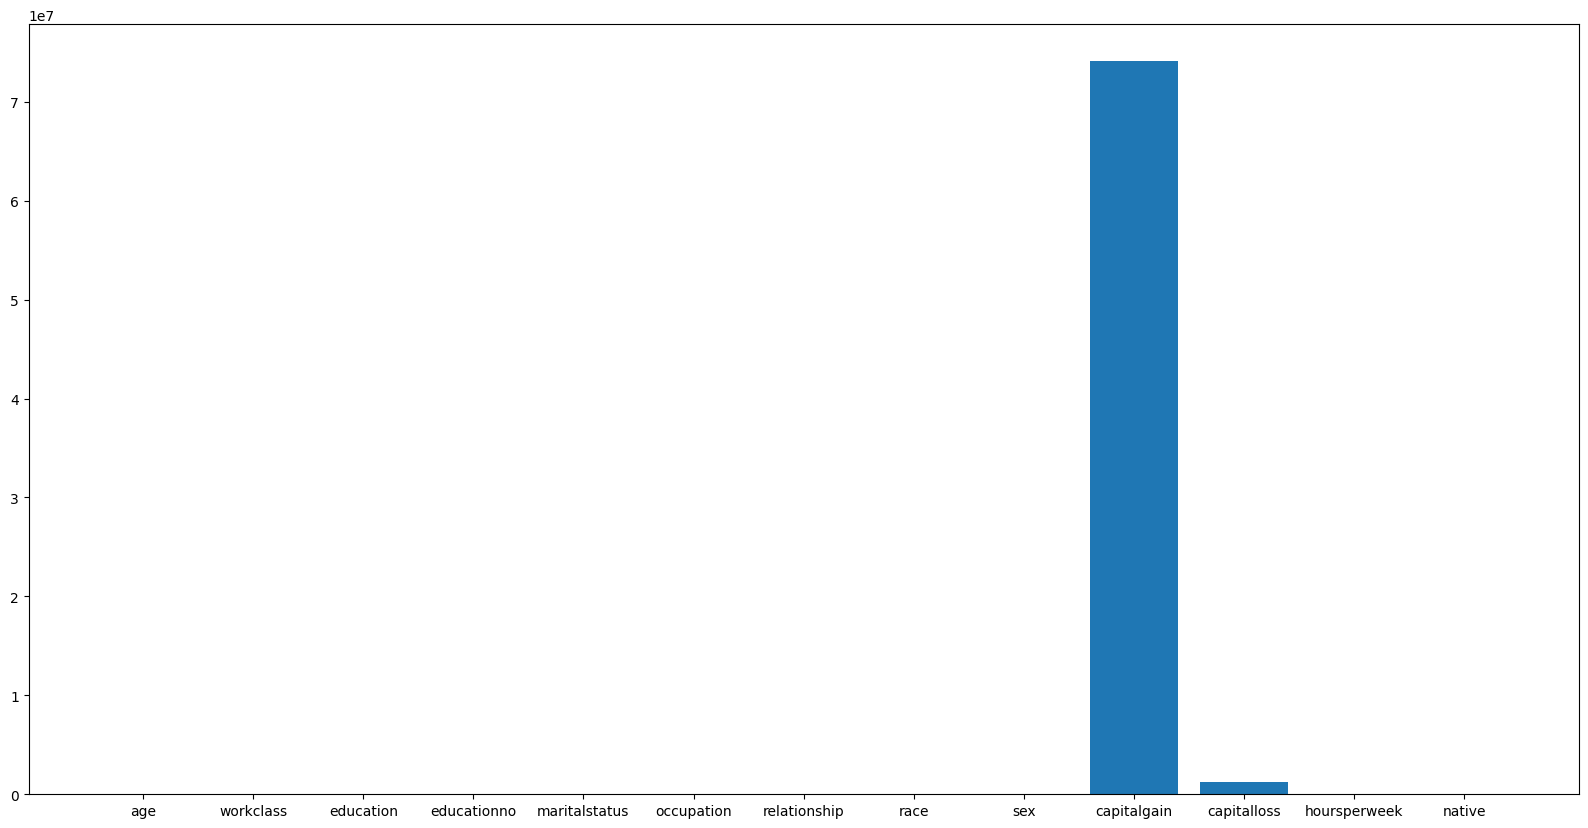

The most relevant features are: [ 0  2  3  4  5  6  8  9 10 11]


In [15]:
# TODO: Call the select_features() function and store the result in X_fs, X_test_fs, and fs
X_fs, X_test_fs, fs = select_features(X_train, y_train, X_test)
# TODO: print the corresponding score of each feature using scores_ attribute of the fs object
for i in range(len(fs.scores_)):
  print('The score for feature',i,'is:',fs.scores_[i])
# TODO: Create a bar plot of the scores
features = ['age', 'workclass', 'education', 'educationno', 'maritalstatus', 'occupation', 'relationship', 'race', 'sex', 'capitalgain', 'capitalloss', 'hoursperweek', 'native']
plt.figure(figsize=(20,10))
plt.bar(features,fs.scores_)
# TODO: Display the bar plot
plt.show()
# TODO Pick out the most relevant features
print('The most relevant features are:',fs.get_support(indices=True))

In [16]:
# TODO: Create a copy of the train_data dataframe called train_data_copy
train_data_copy = train_data.copy()
# TODO: Drop the columns with irrelevant features from the train_data_copy dataframe
train_data_copy = train_data_copy.drop(['workclass','race','native'],axis=1)
# TODO: Display the train_data_copy dataframe
display(train_data_copy)
# TODO: Do the same to the test_data
test_data_copy = test_data.copy()
test_data_copy = test_data_copy.drop(['workclass','race','native'],axis=1)
display(test_data_copy)

,age,education,educationno,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,Salary
0,39,9,13,4,0,1,1,2174,0,40,0
1,50,9,13,2,3,0,1,0,0,13,0
2,38,11,9,0,5,1,1,0,0,40,0
3,53,1,7,2,5,0,1,0,0,40,0
4,28,9,13,2,9,5,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...
30156,27,7,12,2,12,5,0,0,0,38,0
30157,40,11,9,2,6,0,1,0,0,40,1
30158,58,11,9,6,0,4,0,0,0,40,0
30159,22,11,9,4,0,3,1,0,0,20,0


,age,education,educationno,maritalstatus,occupation,relationship,sex,capitalgain,capitalloss,hoursperweek,Salary
0,25,1,7,4,6,3,1,0,0,40,0
1,38,11,9,2,4,0,1,0,0,50,0
2,28,7,12,2,10,0,1,0,0,40,1
3,44,15,10,2,6,0,1,7688,0,40,1
4,34,0,6,4,7,1,1,0,0,30,0
...,...,...,...,...,...,...,...,...,...,...,...
15055,33,9,13,4,9,3,1,0,0,40,0
15056,39,9,13,0,9,1,0,0,0,36,0
15057,38,9,13,2,9,0,1,0,0,50,0
15058,44,9,13,0,0,3,1,5455,0,40,0


## Section 9. Model Training with Highly Relevant Features


In [17]:
# TODO: Repeat all the steps in Section 6 with the new dataset that has irrelevant features removed

# TODO: Create X_train by dropping the 'Salary' column from the train_data dataframe
X_train_data_copy = train_data_copy.drop('Salary',axis=1)
# TODO: Create y_train by selecting only the 'Salary' column from the train_data dataframe
y_train_data_copy = train_data_copy['Salary']
# TODO: Create X_test by dropping the 'Salary' column from the test_data dataframe
X_test_data_copy = test_data_copy.drop('Salary',axis=1)
# TODO: Create y_test by selecting only the 'Salary' column from the test_data dataframe
y_test_data_copy = test_data_copy['Salary']
# TODO: Create a Support Vector Classifier object
clf = SVC()

# TODO: Train the svc model with X_train and y_train
clf.fit(X_train_data_copy,y_train_data_copy)
# TODO: Use the svc model to predict the values of y for X_test and store the result in y_pred
y_pred = clf.predict(X_test_data_copy)
# TODO: Print the confusion matrix of y_test and y_pred
print('The confusion matrix is:',confusion_matrix(y_test_data_copy,y_pred))
# TODO: Print the classification report of y_test and y_pred
print('The classification report is:',classification_report(y_test_data_copy,y_pred))
# TODO: Print the training accuracy of the svc model with X_train and y_train
print('The training accuracy is:',clf.score(X_train_data_copy,y_train_data_copy))
# TODO: Print the testing accuracy of the svc model with X_test and y_test
print('The testing accuracy is:',clf.score(X_test_data_copy,y_test_data_copy))

The confusion matrix is: [[10997   363]
 [ 2703   997]]
The classification report is:               precision    recall  f1-score   support

           0       0.80      0.97      0.88     11360
           1       0.73      0.27      0.39      3700

    accuracy                           0.80     15060
   macro avg       0.77      0.62      0.64     15060
weighted avg       0.79      0.80      0.76     15060

The training accuracy is: 0.7960279831570571
The testing accuracy is: 0.7964143426294821
